In [ ]:
#pip install geodatasets

In [ ]:
#pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
#import fsspec
#import geodatasets
import requests, zipfile, io


## ANALISI DEGLI INCIDENTI AEREI

In [2]:
air_dis = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")

In [3]:
#air_dis.head()

In [4]:
air_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [5]:
print('la nazione con il maggior numero di incidenti è: ' + air_dis['country'].value_counts().idxmax() + '\ncon un numero di incidenti, pari a: ' + str(air_dis['country'].value_counts().max()))

la nazione con il maggior numero di incidenti è: USA
con un numero di incidenti, pari a: 4377


## IN QUALE GIORNO DELLA SETTIMANA AVVENGONO PIU' INCIDENTI?

In [6]:
air_dis['date'].unique()

array(['date unk.', '02-AUG-1919', '11-AUG-1919', ..., '12-MAY-2023',
       '14-MAY-2023', '15-MAY-2023'], dtype=object)

In [7]:
#normalizzazione delle date, eliminazione righe con date aventi formato non valido
air_dis_date_mask = air_dis['date'] != 'date unk.'

In [8]:
air_dis_date = air_dis[air_dis_date_mask]

In [9]:
air_dis_date['date'].head(30)

61    02-AUG-1919
62    11-AUG-1919
63    23-FEB-1920
64    25-FEB-1920
65    30-JUN-1920
66    14-DEC-1920
67    15-JAN-1921
68    02-MAR-1921
69    04-MAR-1921
70    26-AUG-1921
71    27-SEP-1921
72    27-SEP-1921
73    30-DEC-1921
74    22-JAN-1922
75    31-MAR-1922
76    07-APR-1922
77    13-JAN-1923
78    14-MAY-1923
79    25-JUN-1923
80    10-JUL-1923
81    15-JUL-1923
82    27-AUG-1923
83    03-DEC-1923
84    ??-???-1923
85    22-JAN-1924
86    06-AUG-1924
87    24-AUG-1924
88    16-OCT-1925
89    14-NOV-1925
90    18-AUG-1926
Name: date, dtype: object

In [10]:
#normalizzazione delle date, eliminando evenutali righe con caratteri strani
filter = air_dis_date['date'].str.contains("\?")
air_dis_date= air_dis_date[~filter]
filter = air_dis_date['date'].str.contains("14-14")
air_dis_date= air_dis_date[~filter]

In [11]:
air_dis_date['date'].head(30)

61    02-AUG-1919
62    11-AUG-1919
63    23-FEB-1920
64    25-FEB-1920
65    30-JUN-1920
66    14-DEC-1920
67    15-JAN-1921
68    02-MAR-1921
69    04-MAR-1921
70    26-AUG-1921
71    27-SEP-1921
72    27-SEP-1921
73    30-DEC-1921
74    22-JAN-1922
75    31-MAR-1922
76    07-APR-1922
77    13-JAN-1923
78    14-MAY-1923
79    25-JUN-1923
80    10-JUL-1923
81    15-JUL-1923
82    27-AUG-1923
83    03-DEC-1923
85    22-JAN-1924
86    06-AUG-1924
87    24-AUG-1924
88    16-OCT-1925
89    14-NOV-1925
90    18-AUG-1926
91    02-OCT-1926
Name: date, dtype: object

In [12]:
#air_dis_date.iloc[2772]

In [13]:
air_dis_date['date'] = pd.to_datetime(air_dis_date['date'])

C:\Users\e.fiore\AppData\Local\Temp\ipykernel_17152\1013375284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  air_dis_date['date'] = pd.to_datetime(air_dis_date['date'])


In [14]:
air_dis_date.head()

,date,type,registration,operator,fatalities,location,country,cat,year
61,1919-08-02,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920


In [15]:
air_dis_date['day_n']= air_dis_date['date'].dt.day_name()

In [16]:
air_dis_date.head()

,date,type,registration,operator,fatalities,location,country,cat,year,day_n
61,1919-08-02,Caproni Ca.48,NaN,Caproni,14,Verona,Italy,A1,1919,Saturday
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,Monday
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,Monday
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,Wednesday
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,Wednesday


In [17]:
print('Il giorno con più incidenti è: '+ air_dis_date['day_n'].value_counts().idxmax())

Il giorno con più incidenti è: Friday


## QUALI SONO GLI OPERATORI PIù SICURI?

In [18]:
operator_mask = air_dis['operator'].value_counts() == 1

In [19]:
operator_df = air_dis['operator'].value_counts()

In [20]:
print('i migliori operatori sono:\n')
best_operator = operator_df[operator_mask]
print(best_operator)

i migliori operatori sono:

operator
EHR Aviation                   1
Hasit TrockenmÃ¶rtel           1
ART 21631                      1
Suncoast Aviation              1
Tri-state Executive Air        1
                              ..
BAFIN                          1
Dow Chemical Company           1
Aero Bellavista                1
Pacific Missionary Aviation    1
Bar Aviation                   1
Name: count, Length: 4063, dtype: int64


## QUALE MODELLO DI AEREO HA AVUTO PIU' INCIDENTI?

In [21]:
print('il modello di aereo con più incidenti è il '+ air_dis.value_counts('type').idxmin() + ' con un mnumero di incidenti pari a: '+
str(air_dis.value_counts('type').min()))

il modello di aereo con più incidenti è il BAe Nimrod MR.2P con un mnumero di incidenti pari a: 1


In [22]:
air_dis.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


## QUALI SONO I MODELLI DI AEREO CHE HANNO CAUSATO PIU' MORTI?

In [23]:
air_fatalities = air_dis[['type','fatalities','country']]

In [24]:
air_fatalities= air_fatalities.dropna(subset=["fatalities"])

In [25]:
type(air_fatalities['fatalities'])

pandas.core.series.Series

In [26]:
air_fatalities['fatalities']= air_fatalities['fatalities'].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [27]:
air_fatalities

,type,fatalities,country
4,Antonov An-12BP,0.0,Eritrea
7,Antonov An-2,0.0,Russia
8,Antonov An-24B,0.0,Russia
9,Antonov An-26,0.0,Russia
10,Antonov An-26,0.0,Russia
...,...,...,...
23962,Hawker 900XP,0.0,Indonesia
23963,Cessna 208B Grand Caravan,0.0,Indonesia
23964,Cessna 208B Grand Caravan,0.0,Uganda
23965,Boeing 747-4R7F,0.0,Luxembourg


In [28]:
air_fatalities_group = air_fatalities.drop('country', axis=1).groupby('type')

In [29]:
#air_fatalities_group.drop('location', axies=1)
print('I primi 10 modelli di aereo che hanno causato più morti sono:')
air_fatalities_group.sum().sort_values('fatalities', ascending = False).head(10)

I primi 10 modelli di aereo che hanno causato più morti sono:


,fatalities
type,
Douglas C-47A (DC-3),5689.0
Douglas C-47 (DC-3),2619.0
Douglas C-47B (DC-3),1994.0
Tupolev Tu-154M,1395.0
Ilyushin Il-18V,1356.0
DC-9-32,1207.0
Lockheed C-130H Hercules,1192.0
Antonov An-26,1163.0
Junkers Ju-52/3m,1114.0


## RAPPRESENTAZIONE CARTOGRAFICA INCIDENTI AEREI

In [30]:
zipfile = 'ne_110m_admin_0_countries.zip'
states_shp = gpd.read_file(zipfile)

<Axes: >

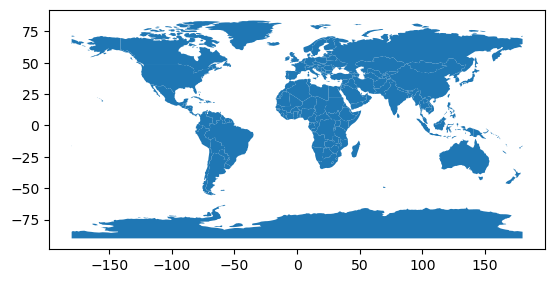

In [31]:
states_shp.plot()

In [32]:
states_shp.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [33]:
air_fatalities.head()

,type,fatalities,country
4,Antonov An-12BP,0.0,Eritrea
7,Antonov An-2,0.0,Russia
8,Antonov An-24B,0.0,Russia
9,Antonov An-26,0.0,Russia
10,Antonov An-26,0.0,Russia


In [34]:
air_state_fatalities_group = air_fatalities.drop('type', axis=1).groupby('country')

In [35]:
air_dis_states = air_state_fatalities_group.sum()
print(air_dis_states.to_string())

                      fatalities
country                         
?                            4.0
Afghanistan                967.0
Albania                     15.0
Algeria                    863.0
American Samoa              98.0
Angola                     989.0
Anguilla                     0.0
Antarctica                 316.0
Antigua                      3.0
Arctic Ocean                 2.0
Argentina                 1015.0
Armenia                    223.0
Aruba                        5.0
Atlantic Ocean            2900.0
Australia                  742.0
Austria                    173.0
Azerbaijan                 336.0
B.V.I.                       0.0
Bahamas                     95.0
Bahrain                    273.0
Bangladesh                 197.0
Barbados                    73.0
Belarus                    266.0
Belgium                    242.0
Belize                       4.0
Benin                      144.0
Bermuda                     66.0
Bhutan                      57.0
Bolivia   

In [94]:
# normalizazione nomi stati
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['United States of America'], 'USA')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['United Republic of Tanzania'], 'Tanzania')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Papua New Guinea'], 'P.N. Guinea')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Democratic Republic of the Congo'], 'D.R. Congo')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Dominican Republic'], 'Dominican Rep.')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['United Kingdom'], 'U.K.')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['The Bahamas'], 'Bahamas')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['East Timor'], 'Timor')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Ivory Coast'], 'Cote d\'Ivoire')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Central African Republic'], 'C.A.R.')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Republic of the Congo'], 'Congo')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Equatorial Guinea'], 'Eq. Guinea')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['eSwatini'], 'Eswatini')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['United Arab Emirates'], 'Saudi Arabia')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Solomon Islands'], 'Solomon Isl.')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Czechia'], 'Czech Rep.')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Northern Cyprus'], 'Cyprus')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Bosnia and Herzegovina'], 'Bosnia')
states_shp['SOVEREIGNT'] = states_shp['SOVEREIGNT'].replace(['Republic of Serbia'], 'Serbia')


In [95]:
air_dis_states_shp = states_shp.merge(air_dis_states, how='left', left_on='SOVEREIGNT', right_on = 'country')

In [98]:
#check nomi stati non corretti. Selezione righe che hanno valore nan per il campo fatalities
fatalities_nan = air_dis_states_shp.loc[air_dis_states_shp['fatalities'].isna()]
print(fatalities_nan['SOVEREIGNT'])

149                 Brunei
167             Somaliland
175    Trinidad and Tobago
Name: SOVEREIGNT, dtype: object


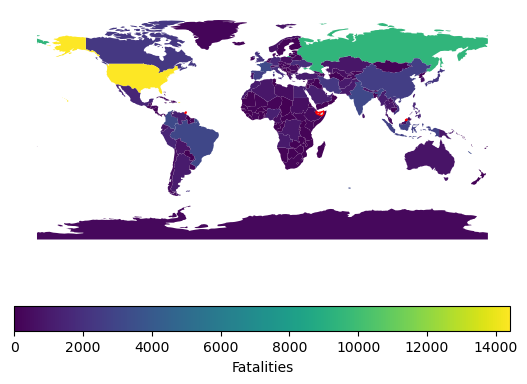

In [99]:
air_dis_states_shp.plot(column="fatalities", 
                        legend=True,
                       legend_kwds={"label": "Fatalities", "orientation": "horizontal"},
                       missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",}
                       ).set_axis_off()